# Proyecto Final de Data Science con Phyton
## Modelo Predictivo de Precios de Casas con Regresión Líneal
### Luis Edmundo Alvarez Soto Carné 21001844

In [87]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
#pip install scikit-learn
#import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
def f_spgraph(p_x, p_y,p_title,p_xlabel, p_ylabel):
    plt.figure(figsize = (9, 6))
    sns.scatterplot(x = p_x, y = p_y, color = 'mediumseagreen')
    plt.title(p_title, fontdict = {'fontsize':15})
    maxDist = max(max(p_y), max(p_x)) 
    minDist = min(min(p_y), min(p_x)) 
    plt.xlabel(p_xlabel, fontdict= {'fontsize':13})
    plt.ylabel(p_ylabel, fontdict= {'fontsize':13})
    plt.tight_layout();

In [3]:
#importar archivo
datos = np.load("proyecto_training_data.npy")

In [4]:
# Transformación del data set en un data frame
df = pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
  
# print DataFrame
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


## Análisis Exploratorio de datos en el DataFrame

In [5]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Gráficas de cada Variable

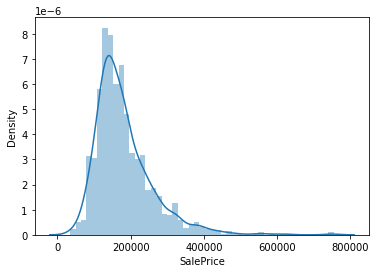

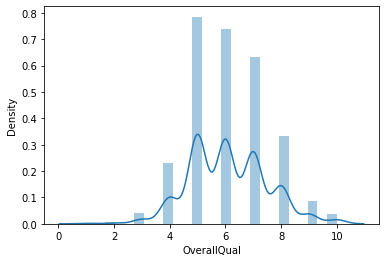

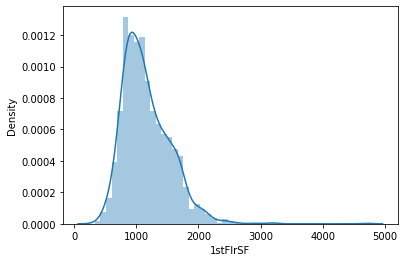

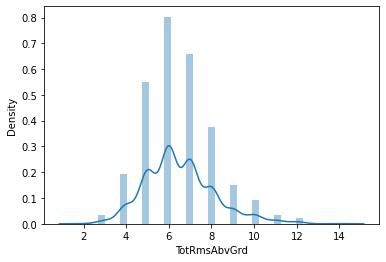

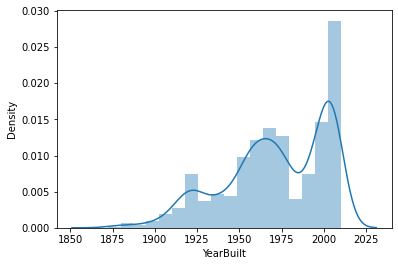

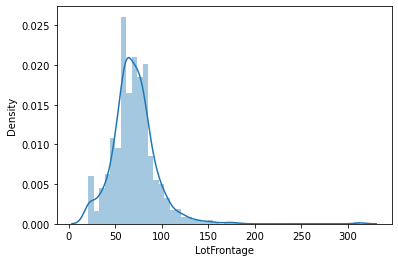

In [6]:
# desactiva mensajes futureWarnings
import warnings
warnings.filterwarnings("ignore")
# create distplots
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])

## Coeficiente de correlación entre el Precio y demás variables

In [7]:
from scipy import stats
from scipy.stats import pearsonr
    

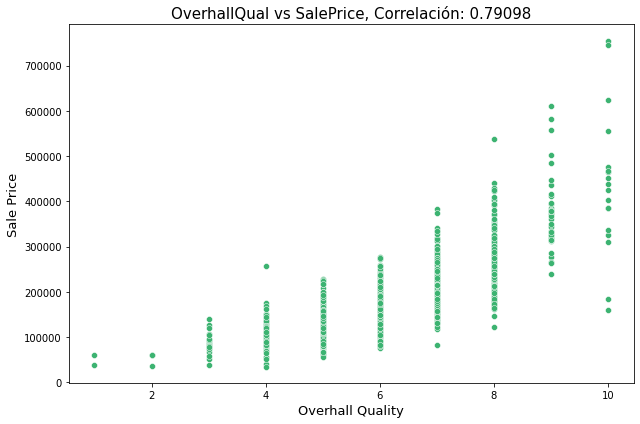

In [8]:
v_corr_oq = round(df['SalePrice'].corr(df['OverallQual'], method='pearson'),5)
#f_spgraph(df['SalePrice'], df['OverallQual'],'SalePrice vs OverhallQual, Correlación: '+ str(v_corr_oq),'Sale Price', 'Overhall Quality')
f_spgraph(df['OverallQual'],df['SalePrice'], 'OverhallQual vs SalePrice, Correlación: '+ str(v_corr_oq), 'Overhall Quality','Sale Price')

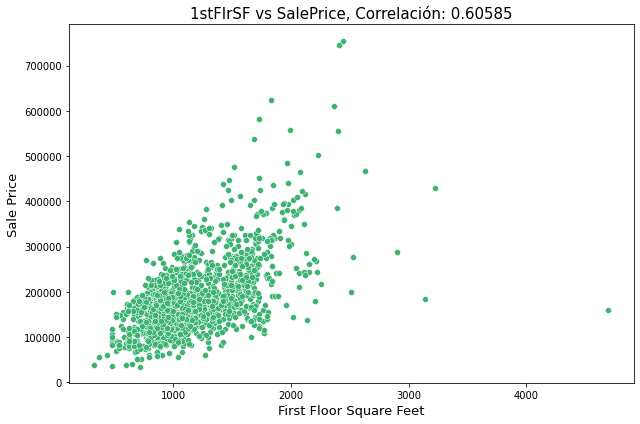

In [9]:
v_corr_ff = round(df['SalePrice'].corr(df['1stFlrSF'], method='pearson'),5)
#f_spgraph(df['SalePrice'], df['1stFlrSF'],'SalePrice vs 1stFlrSF, Correlación: '+ str(v_corr_ff),'Sale Price', 'First Floor Square Feet')
f_spgraph(df['1stFlrSF'],df['SalePrice'],'1stFlrSF vs SalePrice, Correlación: '+ str(v_corr_ff), 'First Floor Square Feet','Sale Price')

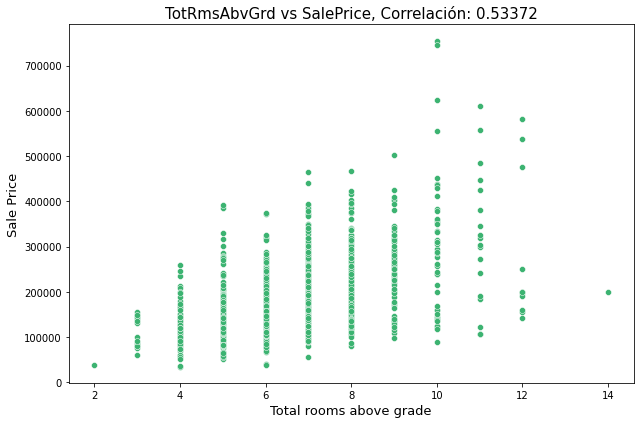

In [10]:
v_corr_ar = round(df['SalePrice'].corr(df['TotRmsAbvGrd'], method='pearson'),5)
f_spgraph(df['TotRmsAbvGrd'],df['SalePrice'], 'TotRmsAbvGrd vs SalePrice, Correlación: '+ str(v_corr_ar),'Total rooms above grade', 'Sale Price')

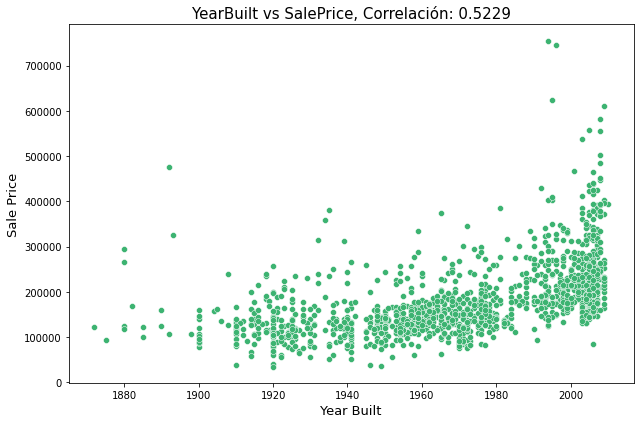

In [11]:
v_corr_yb = round(df['SalePrice'].corr(df['YearBuilt'], method='pearson'),5)
f_spgraph(df['YearBuilt'],df['SalePrice'],'YearBuilt vs SalePrice, Correlación: '+ str(v_corr_yb), 'Year Built','Sale Price')

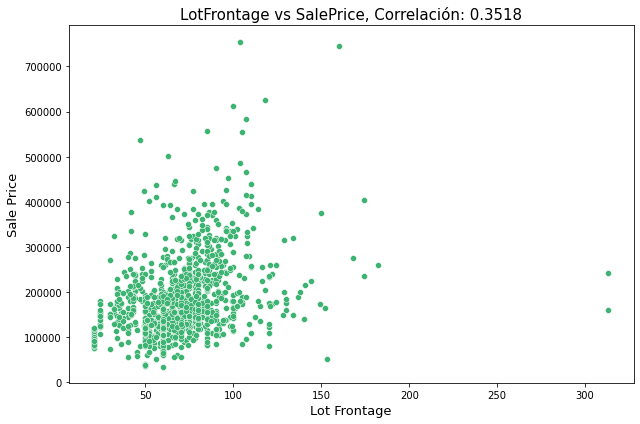

In [12]:
v_corr_lf = round(df['SalePrice'].corr(df['LotFrontage'], method='pearson'),5)
f_spgraph(df['LotFrontage'],df['SalePrice'],'LotFrontage vs SalePrice, Correlación: '+ str(v_corr_lf), 'Lot Frontage','Sale Price')

**Nota** las variables con más correlación respecto al Sale Price son: *Overhall Quality (0.79098) y First Floor Square feet (0.60585)*

## Separación del Set de Datos para Entrenamiento y de Pruebas 

In [13]:
#verificación de tamaño de archivo
numrows, numcols = datos.shape;
testrows = int(numrows * 0.8);
print("shape of data:",df.shape)
print("Rows: ",numrows,testrows)
print("Cols: ",numcols)

shape of data: (1460, 6)
Rows:  1460 1168
Cols:  6


In [14]:
print(df[:testrows])

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]


In [102]:
print(df[testrows:])

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
1168   235000.0          6.0    1236.0           7.0     1935.0        120.0
1169   625000.0         10.0    1831.0          10.0     1995.0        118.0
1170   171000.0          6.0    1118.0           6.0     1977.0         76.0
1171   163000.0          6.0    1261.0           6.0     1958.0         76.0
1172   171900.0          7.0     625.0           5.0     2006.0         35.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[292 rows x 6 columns]


In [15]:
datatrain = df[:testrows]
datatest = df[testrows:]
print("shape of datatrain:",datatrain.shape)
print("shape of datatest:",datatest.shape)


shape of datatrain: (1168, 6)
shape of datatest: (292, 6)


### Función de entrenamiento del Modelo de Regresión líneal y = mx + b

#### Función que agrega columna de 1

In [16]:
def f_matrizones(x):
    filas=np.shape(x)
    
    #print(filas)
    s = (filas[0],2)
    #print("s",s)
    v_m = np.ones(s)
    for i in range(len(v_m)):
        v_m[i][0] = v_m[i][0] * x[i]
    #v_m = np.ones(s)
    return v_m

#### Función de entrenamiento del Modelo

In [67]:
def f_trainlr(x, y, epochs, ierror, lr, m, b):
    # inicializa vector de parámetros con m y b igual a cero
    v_param = np.array([m,b])
    #print(v_param)
    epoch = 0
    # Crea matriz de entranimiento con columna concatenada con valores 1 para poder utilizar Matmul
    m_train = f_matrizones(x)
    #Diccionario para modelo resultante
    d_param = {}
    #vector del promedio de errores
    v_errores = []
    while epoch <= epochs:
        # Mutiplica la matriz de entramiento con el vector de parámetros
        yhat = np.matmul(m_train,v_param)

        # Resta de valor estimado (yhat) & valor esperado y
        yhat_y = np.subtract(yhat,y/1000)

        # calcula error
        error = np.power(yhat_y,2)/2

        # calcula promedio del error de la iteración
        erravg = np.mean(error)
        # agrega el error al vector
        v_errores.append(erravg)

        # calcula gradientes de m y b
        gradm = np.mean(x* yhat_y)*lr
        gradb = np.mean(yhat_y)*lr
        v_grad = np.array([gradm,gradb])
        
        # asigna nuevos parámetros a la siguiente iteración
        v_param = v_param - v_grad

        # agrega vector de parámetro al diccionario
        d_param[epoch] = v_param

        # evalúa si imprime o no la iteración y el promedio del error
        if epoch % ierror == 0:
            print("Iteración y error: ", epoch,erravg)
        epoch+=1
    return d_param, v_errores


#### Función para graficar

In [41]:
def f_plotgraph(px,py,ptitle,pxlabel,pylabel):
    plt.plot(np.linspace(0,len(py),len(py)),px)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)
    plt.show()

#### Ejecuta modelo con OverallQual vs SalePrice

Iteración y error:  300000 1333.4752664503123


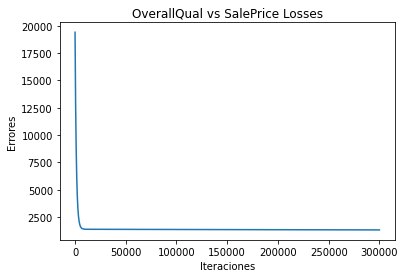

In [30]:
# parámetros f_trainlr(x, y, epochs, ierror, lr, m, b):
p_param, p_errores = f_trainlr(datatrain['OverallQual'], datatrain['SalePrice'], 300000, 300000, 0.00001, 0,0)
#parámetros f_grafica(px,py,ptitle,pxlabel,pylabel)
f_plotgraph(p_errores,p_param,'OverallQual vs SalePrice Losses','Iteraciones','Errores')

#### Ejecuta modelo con 1stFlrSF vs SalePrice

Iteración y error:  0 19409.722053221747
Iteración y error:  1000 1968.0848699299586


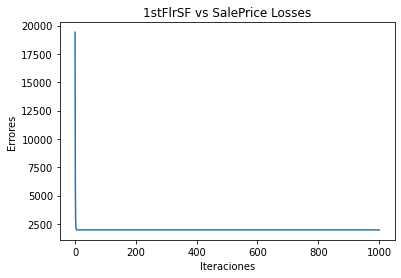

In [79]:
# parámetros f_trainlr(x, y, epochs, ierror, lr, m, b):
p_param, p_errores = f_trainlr(datatrain['1stFlrSF'], datatrain['SalePrice'], 1000, 1000, 0.000001, 0,0)
#parámetros f_grafica(px,py,ptitle,pxlabel,pylabel)
f_plotgraph(p_errores,p_param,'1stFlrSF vs SalePrice Losses','Iteraciones','Errores')

## Gráficas de la evolución del modelo entrenado

#### Función para graficar

In [83]:
def f_regresiongraph(p_x,p_y,p_d, n):
    lp = np.linspace(0,np.max(p_x)+1,100)
    for i in range(0,len(p_d),n):
        fx = p_d[i][0] * lp + p_d[i][1]
        plt.scatter(p_x,p_y/1000)
        plt.plot(lp,fx, 'r')
        plt.title("Iteración: " + str(i))
        plt.xlabel(str(p_x.name))
        plt.ylabel(str(p_y.name))
        plt.show()

In [77]:
p_param, p_errores = f_trainlr(datatrain['OverallQual'], datatrain['SalePrice'], 300000, 50000, 0.00001, 0,0)

Iteración y error:  0 19409.722053221747
Iteración y error:  50000 1383.3063864289377
Iteración y error:  100000 1372.374767904271
Iteración y error:  150000 1361.9486707602118
Iteración y error:  200000 1352.0047176839055
Iteración y error:  250000 1342.5206124221272
Iteración y error:  300000 1333.4750897887977


#### Grafica parámetros encontrados en el entrenamiento de la función con OverallQual vs SalePrice

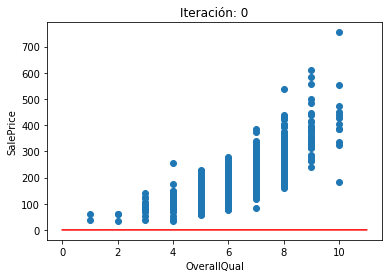

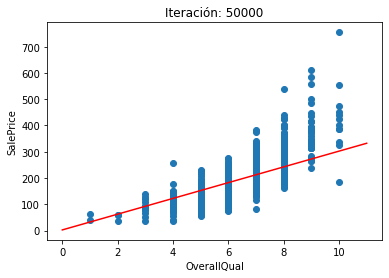

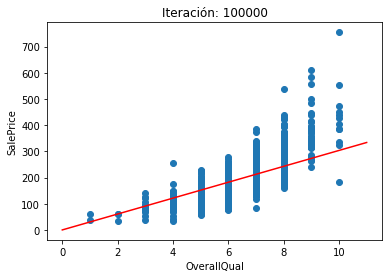

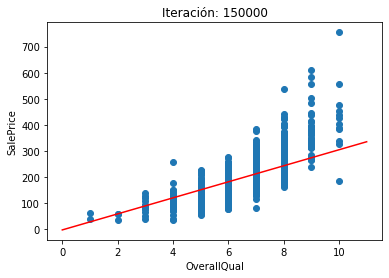

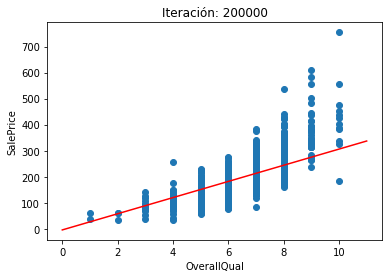

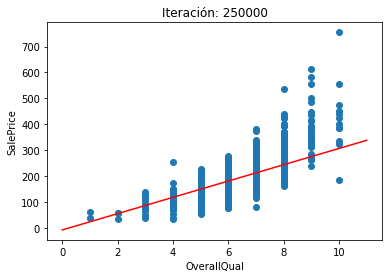

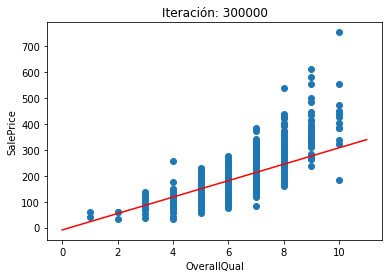

In [78]:
f_regresiongraph(datatrain['OverallQual'], datatrain['SalePrice'],p_param,50000)

In [69]:
p_param, p_errores = f_trainlr(datatrain['1stFlrSF'], datatrain['SalePrice'], 1000, 100, 0.000001, 0,0)

Iteración y error:  0 19409.722053221747
Iteración y error:  100 1968.0922648703754
Iteración y error:  200 1968.0914431481897
Iteración y error:  300 1968.0906214415397
Iteración y error:  400 1968.0897997504248
Iteración y error:  500 1968.0889780748446
Iteración y error:  600 1968.0881564147994
Iteración y error:  700 1968.0873347702882
Iteración y error:  800 1968.0865131413113
Iteración y error:  900 1968.0856915278682
Iteración y error:  1000 1968.0848699299586


#### Grafica parámetros encontrados en el entrenamiento de la función con 1stFlrsf  vs SalePrice

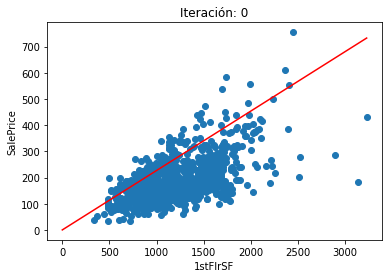

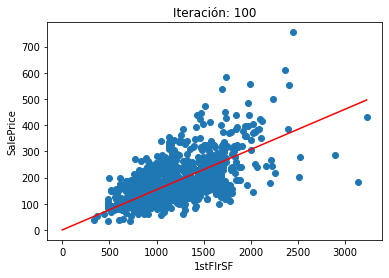

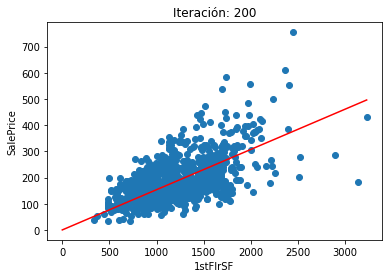

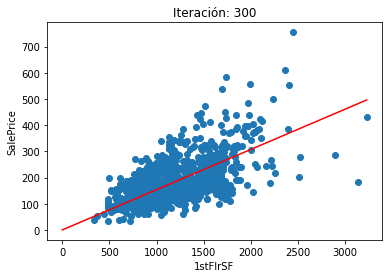

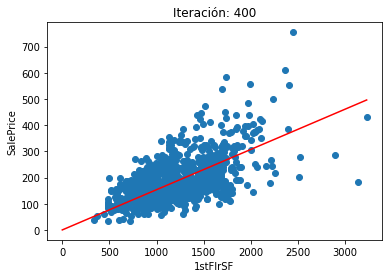

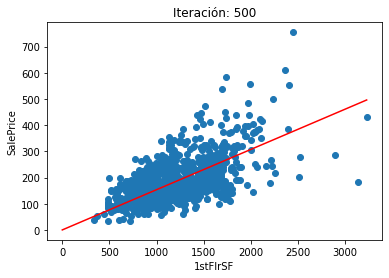

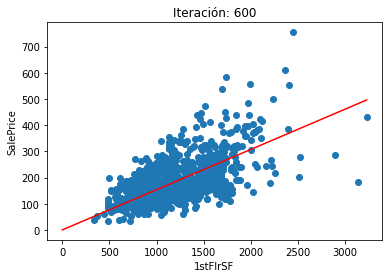

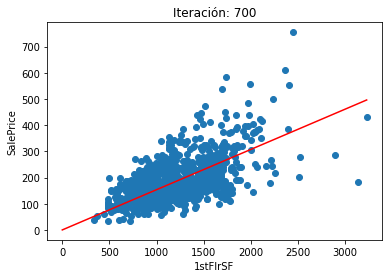

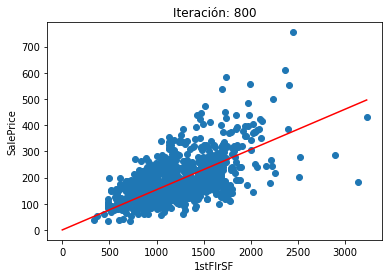

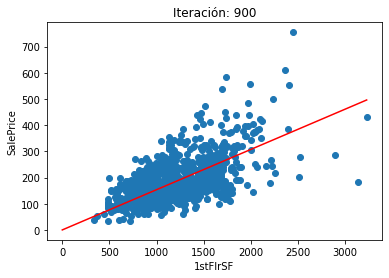

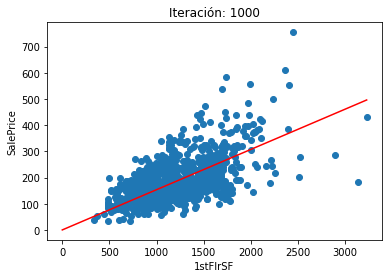

In [84]:
f_regresiongraph(datatrain['1stFlrSF'], datatrain['SalePrice'],p_param,100)

### Modelo Manual Vs Scikit-learn

In [103]:
d_overallQual = pd.DataFrame(datatrain['OverallQual'])
d_saleprice = pd.DataFrame(datatrain['SalePrice'])
r_overallQual = LinearRegression().fit(d_overallQual, d_saleprice)
r_score = r_overallQual.score(d_overallQual, d_saleprice)
print(r_score)

0.6304202002336672


In [99]:
d_1stFlrSF = pd.DataFrame(datatrain['1stFlrSF'])
d_saleprice = pd.DataFrame(datatrain['SalePrice'])
r_1stFlrSF = LinearRegression().fit(d_1stFlrSF, d_saleprice)
r_score = r_1stFlrSF.score(d_1stFlrSF, d_saleprice)
print(r_score)

0.37981176187078936
